In [315]:

import warnings
warnings.filterwarnings("ignore") # Shhhh
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV,KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import BaggingClassifier
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS as stopwords
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from nltk.stem import PorterStemmer
import nltk
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [316]:
df_train = pd.read_csv('./data/large_train_sample.csv')
df_val =  pd.read_csv('./data/test_data.csv')

In [317]:
df_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,wage
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K


In [318]:
df_val.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Male,0,0,40,United-States
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,Male,0,0,50,United-States
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,Male,0,0,40,United-States
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Male,7688,0,40,United-States
4,18,?,103497,Some-college,10,Never-married,?,Own-child,Female,0,0,30,United-States


In [319]:
df_train.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'wage'],
      dtype='object')

In [320]:
df_val.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')

In [321]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
wage              32561 non-null object
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


In [322]:
df_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 13 columns):
age               16281 non-null int64
workclass         16281 non-null object
fnlwgt            16281 non-null int64
education         16281 non-null object
education-num     16281 non-null int64
marital-status    16281 non-null object
occupation        16281 non-null object
relationship      16281 non-null object
sex               16281 non-null object
capital-gain      16281 non-null int64
capital-loss      16281 non-null int64
hours-per-week    16281 non-null int64
native-country    16281 non-null object
dtypes: int64(6), object(7)
memory usage: 1.6+ MB


In [323]:
df_train.shape


(32561, 14)

In [324]:
df_val.shape

(16281, 13)

In [325]:
all_nan_values = df_train.isnull().sum()[df_train.isnull().sum()  > 0].sort_values(ascending = False)

In [326]:
all_nan_values

Series([], dtype: int64)

In [327]:
all_nan_values_val = df_val.isnull().sum()[df_train.isnull().sum()  > 0].sort_values(ascending = False)

In [328]:
all_nan_values_val

Series([], dtype: int64)

In [329]:
df_train.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [330]:
df_val.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,16281.000000,1.628100e+04,16281.000000,16281.000000,16281.000000,16281.000000
mean,38.767459,1.894357e+05,10.072907,1081.905104,87.899269,40.392236
std,13.849187,1.057149e+05,2.567545,7583.935968,403.105286,12.479332
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.167360e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.778310e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.383840e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,3770.000000,99.000000


In [331]:
df_train['wage'].value_counts()

 <=50K    24720
 >50K      7841
Name: wage, dtype: int64

In [332]:

wage = {
    
       '<=50K':0,
       ' >50K':1
    
}

In [333]:
df_train['wage'] = df_train['wage'].map(wage)

In [334]:
df_train['wage'].unique()

array([nan,  1.])

In [335]:
df_train['wage']= df_train['wage'].fillna(0)

In [336]:
df_train['wage'] = df_train['wage'].astype(int)

In [337]:
df_train['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [338]:
df_train[['education', 'education-num']]

,education,education-num
0,Bachelors,13
1,Bachelors,13
2,HS-grad,9
3,11th,7
4,Bachelors,13
...,...,...
32556,Assoc-acdm,12
32557,HS-grad,9
32558,HS-grad,9
32559,HS-grad,9


In [339]:
df_train['capital-gain'].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
4931         1
1455         1
6097         1
22040        1
1111         1
Name: capital-gain, Length: 119, dtype: int64

Text(0.5, 0, 'Greater Living Area(Sq FT)')

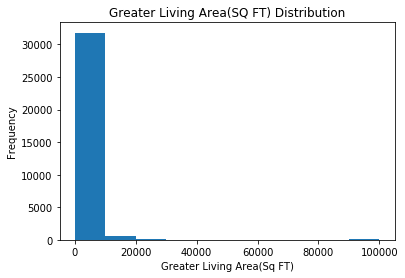

In [340]:
ax = df_train['capital-gain'].plot(kind = 'hist',
                               y = 'Frequency',
                               title = 'Greater Living Area(SQ FT) Distribution')


ax.set_xlabel("Greater Living Area(Sq FT)")

In [341]:
df_train['sex'] = pd.get_dummies(df_train['sex'], drop_first = True)



In [342]:
df_val['sex'] = pd.get_dummies(df_val['sex'], drop_first = True)


In [343]:
df_train.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'wage'],
      dtype='object')

In [344]:
df_train

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,wage
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,1,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,1,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,1,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,1,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,0,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,0,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,1,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,0,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,1,0,0,20,United-States,0


In [345]:
df_train['native-country'].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [346]:
df_train['workclass']

0                State-gov
1         Self-emp-not-inc
2                  Private
3                  Private
4                  Private
               ...        
32556              Private
32557              Private
32558              Private
32559              Private
32560         Self-emp-inc
Name: workclass, Length: 32561, dtype: object

In [347]:
df_train['workclassrank'] = df_train['workclass'].replace({' Private':8,
       ' Self-emp-not-inc':7,
       ' Self-emp-inc':6,
       ' Federal-gov':5,
       ' Local-gov':4,
       ' State-gov':3,
       ' Without-pay':2,
       ' Never-worked':1,
        ' ?' : 0})

In [348]:
df_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,wage,workclassrank
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,1,2174,0,40,United-States,0,3
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,1,0,0,13,United-States,0,7
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,1,0,0,40,United-States,0,8
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,1,0,0,40,United-States,0,8
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,0,0,0,40,Cuba,0,8


In [349]:
df_train['workclassrank'].unique()

array([3, 7, 8, 5, 4, 0, 6, 2, 1])

In [350]:
df_val['workclassrank'] = df_val['workclass'].replace({' Private':8,
       ' Self-emp-not-inc':7,
       ' Self-emp-inc':6,
       ' Federal-gov':5,
       ' Local-gov':4,
       ' State-gov':3,
       ' Without-pay':2,
       ' Never-worked':1,
        ' ?' : 0})

In [351]:
df_val['workclassrank'].unique()

array([8, 4, 0, 7, 5, 3, 6, 2, 1])

In [352]:
education_rank = {' Preschool':1,
                  ' 1st-4th': 2,
                  ' 5th-6th':3,
                  ' 7th-8th':4,
                  ' 9th':5,
                  ' 10th':6,
                  ' 11th':7,
                  ' 12th':8,
                  ' HS-grad':9,
                  ' Some-college':10,
                  ' Assoc-acdm':11,
                  ' Assoc-voc':11,
                  ' Bachelors':12,
                  ' Prof-school':13,
                  ' Masters':14,
                  ' Doctorate':15}
df_train['ed_rank'] = df_train['education'].replace(education_rank)

In [353]:
df_val['ed_rank'] = df_val['education'].replace(education_rank)

In [354]:
df_train['ed_rank'].unique()

array([12,  9,  7, 14,  5, 10, 11,  4, 15, 13,  3,  6,  2,  1,  8])

In [355]:
df_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,wage,workclassrank,ed_rank
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,1,2174,0,40,United-States,0,3,12
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,1,0,0,13,United-States,0,7,12
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,1,0,0,40,United-States,0,8,9
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,1,0,0,40,United-States,0,8,7
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,0,0,0,40,Cuba,0,8,12


In [356]:
df_train['total_income'] = df_train['fnlwgt'] + df_train['capital-gain'] - df_train['capital-loss']

In [357]:
df_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,wage,workclassrank,ed_rank,total_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,1,2174,0,40,United-States,0,3,12,79690
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,1,0,0,13,United-States,0,7,12,83311
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,1,0,0,40,United-States,0,8,9,215646
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,1,0,0,40,United-States,0,8,7,234721
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,0,0,0,40,Cuba,0,8,12,338409


In [358]:
df_val['total_income'] = df_val['fnlwgt'] + df_val['capital-gain'] - df_val['capital-loss']

In [359]:
df_val

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,workclassrank,ed_rank,total_income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,1,0,0,40,United-States,8,7,226802
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,1,0,0,50,United-States,8,9,89814
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,1,0,0,40,United-States,4,11,336951
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,1,7688,0,40,United-States,8,10,168011
4,18,?,103497,Some-college,10,Never-married,?,Own-child,0,0,0,30,United-States,0,10,103497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,0,0,0,36,United-States,8,12,215419
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,1,0,0,40,United-States,0,9,321403
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,1,0,0,50,United-States,8,12,374983
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,1,5455,0,40,United-States,8,12,89346


In [360]:
df_train['marital-status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [361]:
df_train["marital-status"] = df_train["marital-status"].replace([' Never-married',' Divorced',' Separated',' Widowed'], ' Single')
df_train["marital-status"] = df_train["marital-status"].replace([' Married-civ-spouse',' Married-spouse-absent',' Married-AF-spouse'], ' Married')


In [362]:
df_train['marital-status'].unique()

array([' Single', ' Married'], dtype=object)

In [363]:
df_train['marital-status']

0          Single
1         Married
2          Single
3         Married
4         Married
           ...   
32556     Married
32557     Married
32558      Single
32559      Single
32560     Married
Name: marital-status, Length: 32561, dtype: object

In [364]:
df_train['marital-status'] = df_train['marital-status'].map({" Married" : 1, " Single" : 0})

In [365]:
df_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,wage,workclassrank,ed_rank,total_income
0,39,State-gov,77516,Bachelors,13,0,Adm-clerical,Not-in-family,1,2174,0,40,United-States,0,3,12,79690
1,50,Self-emp-not-inc,83311,Bachelors,13,1,Exec-managerial,Husband,1,0,0,13,United-States,0,7,12,83311
2,38,Private,215646,HS-grad,9,0,Handlers-cleaners,Not-in-family,1,0,0,40,United-States,0,8,9,215646
3,53,Private,234721,11th,7,1,Handlers-cleaners,Husband,1,0,0,40,United-States,0,8,7,234721
4,28,Private,338409,Bachelors,13,1,Prof-specialty,Wife,0,0,0,40,Cuba,0,8,12,338409


In [366]:
df_train['wage'].value_counts()

0    24720
1     7841
Name: wage, dtype: int64

In [367]:
df_val["marital-status"] = df_val["marital-status"].replace([' Never-married',' Divorced',' Separated',' Widowed'], ' Single')
df_val["marital-status"] = df_val["marital-status"].replace([' Married-civ-spouse',' Married-spouse-absent',' Married-AF-spouse'], ' Married')


In [368]:
df_val['marital-status'] = df_val['marital-status'].map({" Married" : 1, " Single" : 0})

In [369]:
df_val.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,workclassrank,ed_rank,total_income
0,25,Private,226802,11th,7,0,Machine-op-inspct,Own-child,1,0,0,40,United-States,8,7,226802
1,38,Private,89814,HS-grad,9,1,Farming-fishing,Husband,1,0,0,50,United-States,8,9,89814
2,28,Local-gov,336951,Assoc-acdm,12,1,Protective-serv,Husband,1,0,0,40,United-States,4,11,336951
3,44,Private,160323,Some-college,10,1,Machine-op-inspct,Husband,1,7688,0,40,United-States,8,10,168011
4,18,?,103497,Some-college,10,0,?,Own-child,0,0,0,30,United-States,0,10,103497


In [370]:
df_train['wage'].value_counts()

0    24720
1     7841
Name: wage, dtype: int64

In [384]:
occupation=   {
       ' Adm-clerical':2,
       ' Exec-managerial':3,
       ' Prof-specialty' :3,
       ' Handlers-cleaners':1,
       ' Other-service':1,
       ' Sales':2,
       ' Craft-repair':2,
       ' Transport-moving':2,
       ' Farming-fishing':2,
       ' Machine-op-inspct':2,
       ' Tech-support':3,
       ' Protective-serv':3,
       ' Armed-Forces':2,
       ' Priv-house-serv':1,
        ' ?': 2, 
}

In [385]:
df_train['occupation_rank'] = df_train['occupation'].map(occupation)

In [387]:
df_val['occupation_rank'] = df_val['occupation'].map(occupation)

In [517]:
nominal_cols = ['relationship', 'native-country', 'occupation', 'workclass']

In [518]:
df_train = pd.get_dummies(df_train, columns= nominal_cols, drop_first=True)

In [525]:
df_train.columns

Index(['age', 'fnlwgt', 'education', 'education-num', 'marital-status', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'wage',
       'workclassrank', 'ed_rank', 'total_income', 'occupation_rank',
       'relationship_ Not-in-family', 'relationship_ Other-relative',
       'relationship_ Own-child', 'relationship_ Unmarried',
       'relationship_ Wife', 'native-country_ Cambodia',
       'native-country_ Canada', 'native-country_ China',
       'native-country_ Columbia', 'native-country_ Cuba',
       'native-country_ Dominican-Republic', 'native-country_ Ecuador',
       'native-country_ El-Salvador', 'native-country_ England',
       'native-country_ France', 'native-country_ Germany',
       'native-country_ Greece', 'native-country_ Guatemala',
       'native-country_ Haiti', 'native-country_ Holand-Netherlands',
       'native-country_ Honduras', 'native-country_ Hong',
       'native-country_ Hungary', 'native-country_ India',
       'native-country_ Iran', 'na

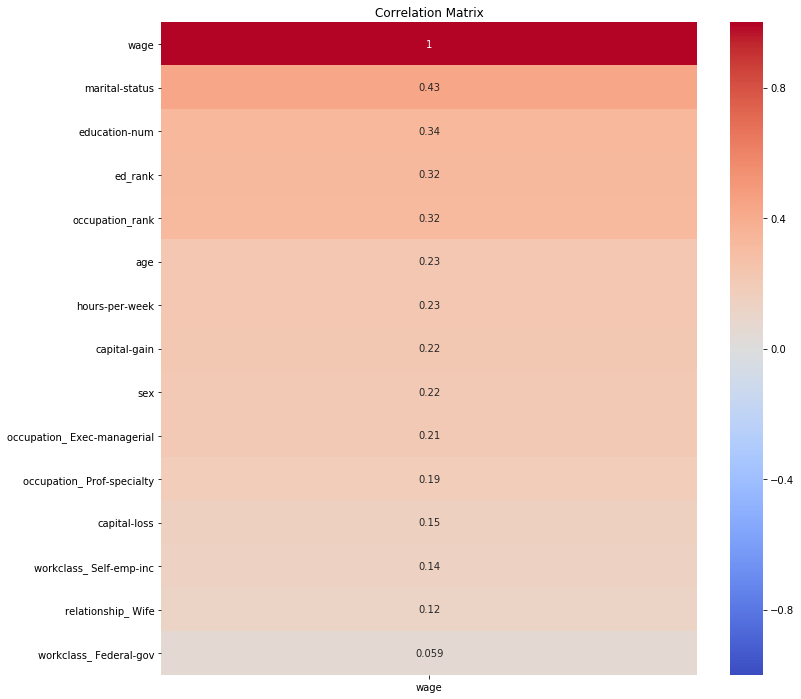

In [522]:
plt.figure(figsize=(12,12))
plt.title("Correlation Matrix")
sns.heatmap(df_train.corr()[['wage']].sort_values('wage', ascending = False).head(15), 
            annot = True, cmap = "coolwarm", vmax = 1, vmin = -1)

In [530]:


X = df_train[['marital-status', 'education-num', 'occupation_rank', 'age', 'hours-per-week', 'capital-gain',
             'sex','occupation_ Exec-managerial' , 'occupation_ Prof-specialty', 'capital-loss', 
            'workclass_ Self-emp-inc', 'relationship_ Wife', 'workclass_ Federal-gov']]
Y = df_train['wage']
validation_size = 0.30
seed = 42
num_folds = 10
scoring = 'accuracy'
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,
    test_size=validation_size,random_state=seed, stratify = Y)

# Params for Random Forest
num_trees = 100
max_features = 7

#Spot Check 5 Algorithms (LR, LDA, KNN, CART, GNB, SVM)
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv= kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.844507 (0.010325)
KNN: 0.845385 (0.008165)
CART: 0.825948 (0.007756)
NB: 0.817567 (0.008233)
RF: 0.843498 (0.004202)


In [531]:
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_test, Y_test, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.849625 (0.010796)
KNN: 0.834066 (0.008623)
CART: 0.817996 (0.009863)
NB: 0.814822 (0.014854)
RF: 0.838058 (0.013370)


In [536]:
random_forest = RandomForestClassifier(n_estimators=250,max_features=7)
random_forest.fit(X_train, Y_train)
predictions = random_forest.predict(X_test)
print("Accuracy: %s%%" % (100*accuracy_score(Y_test, predictions)))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

Accuracy: 84.30750332685024%
[[6795  622]
 [ 911 1441]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      7417
           1       0.70      0.61      0.65      2352

    accuracy                           0.84      9769
   macro avg       0.79      0.76      0.78      9769
weighted avg       0.84      0.84      0.84      9769



In [537]:

model_1_predict_model = LogisticRegression(penalty='l2')
model_1_predict_model.fit(X_train,Y_train)

predict_train_1 = model_1_predict_model.predict(X_train)
predict_test_1  = model_1_predict_model.predict(X_test)

In [538]:
from sklearn.metrics import f1_score
print("Model's Accuracy values       :",model_1_predict_model.score(X_test,Y_test))

Model's Accuracy values       : 0.8489098167673252


In [541]:
model_2_predict_model = LogisticRegression(penalty='l1')
model_2_predict_model.fit(X_train,Y_train)

predict_train_2 = model_2_predict_model.predict(X_train)
predict_test_2  = model_2_predict_model.predict(X_test)

In [542]:

print("Model's Accuracy values       :",model_1_predict_model.score(X_train,Y_train))

Model's Accuracy values       : 0.8459108459108459


In [543]:
from sklearn.svm import SVC
svc = SVC()
model_3_predict_model = svc.fit(X_train, Y_train)

In [544]:
predict_train_3 = model_3_predict_model.predict(X_train)
predict_test_3  = model_3_predict_model.predict(X_test)

In [545]:
print("Model's Accuracy values       :",model_3_predict_model.score(X_train,Y_train))

Model's Accuracy values       : 0.8831607581607581


In [546]:
print("Model's Accuracy values       :",model_3_predict_model.score(X_test,Y_test))

Model's Accuracy values       : 0.8472719828027434


In [547]:
model_2_predict_model.coef_

array([[1.94908354e+00, 2.74663809e-01, 5.76301922e-01, 2.60528640e-02,
        2.75904534e-02, 3.18685934e-04, 8.66291563e-01, 2.99576387e-01,
        4.53622891e-02, 6.28228868e-04, 3.69629857e-01, 1.36153799e+00,
        6.62848319e-01]])

In [548]:
X_test.columns

Index(['marital-status', 'education-num', 'occupation_rank', 'age',
       'hours-per-week', 'capital-gain', 'sex', 'occupation_ Exec-managerial',
       'occupation_ Prof-specialty', 'capital-loss', 'workclass_ Self-emp-inc',
       'relationship_ Wife', 'workclass_ Federal-gov'],
      dtype='object')

In [549]:
df_coef = pd.DataFrame(list(zip(X_test.columns, 
                     model_2_predict_model.coef_[0])), columns = ['word', 'coeficients'])

In [550]:
df_coef

,word,coeficients
0,marital-status,1.949084
1,education-num,0.274664
2,occupation_rank,0.576302
3,age,0.026053
4,hours-per-week,0.027590
5,capital-gain,0.000319
6,sex,0.866292
7,occupation_ Exec-managerial,0.299576
8,occupation_ Prof-specialty,0.045362
9,capital-loss,0.000628
